# 3.4 Pareto distributed loss, reinsurance
Sampling of pareto is given in #1 p. 25.


In [2]:
m <- 100000
beta <- 2
alpha <- 3
lambda <- 10
as = c(0, 1, 4, 6)

computeReinsurancePremium = function(m, beta, alpha, lambda, a){
    U = runif(m)
    Z = beta*(U**(-1/alpha) - 1)
    Zre = pmax(Z - a, 0)
    piRe = lambda*mean(Zre)    
}

numberOfMCs = 10
for (MCnumber in 1:numberOfMCs){
    print(c('MC # ', MCnumber))
    for ( a in as){
        piRe = computeReinsurancePremium(m, beta, alpha, lambda, a)
        print(c('a: ', a, 'piRe: ', piRe))
    }
}

[1] "MC # " "1"    
[1] "a: "              "0"                "piRe: "           "9.90199565761557"
[1] "a: "              "1"                "piRe: "           "4.34297993191488"
[1] "a: "             "4"               "piRe: "          "1.1754734269424"
[1] "a: "               "6"                 "piRe: "           
[4] "0.632891795097093"
[1] "MC # " "2"    
[1] "a: "              "0"                "piRe: "           "9.96619267271626"
[1] "a: "             "1"               "piRe: "          "4.5523542104325"
[1] "a: "              "4"                "piRe: "           "1.12973000421274"
[1] "a: "               "6"                 "piRe: "           
[4] "0.607186066598396"
[1] "MC # " "3"    
[1] "a: "              "0"                "piRe: "           "10.0154374717663"
[1] "a: "              "1"                "piRe: "           "4.44753272765946"
[1] "a: "              "4"                "piRe: "           "1.09608278980339"
[1] "a: "               "6"                 "piRe: "

Pretty stable.
# 3.5 Double reinsurance

In [14]:
m <- 100000
beta <- 2
alpha <- 3
lambda <- 10
as = c(1, 2)
bs = c(2, 4, 6)
gamma = .5

computeReinsurancePremium = function(m, beta, alpha, lambda, a, b, gamma){
    U = runif(m)
    Z = beta*(U**(-1/alpha) - 1)
    Zre1 = pmax(Z - a, 0)
    Zre2 = gamma*pmax(Zre1 - b, 0)
    piRe2 = lambda*mean(Zre2)
}

numberOfMCs = 2
for (MCnumber in 1:numberOfMCs){
    print(c('############## MC  ', MCnumber, '############'))
    for (a in as){
        print(c('a: ', a))
        for ( b in bs){
            print(c('b: ', b))
            piRe = computeReinsurancePremium(m, beta, alpha, lambda, a, b, gamma)
            print(c('piRe: ', piRe))
        }
    }
}

[1] "############## MC  " "1"                   "############"       
[1] "a: " "1"  
[1] "b: " "2"  
[1] "piRe: "            "0.822820115248204"
[1] "b: " "4"  
[1] "piRe: "            "0.411247561452621"
[1] "b: " "6"  
[1] "piRe: "            "0.228373197093108"
[1] "a: " "2"  
[1] "b: " "2"  
[1] "piRe: "            "0.522676199848743"
[1] "b: " "4"  
[1] "piRe: "            "0.328843984471508"
[1] "b: " "6"  
[1] "piRe: "            "0.205684554160708"
[1] "############## MC  " "2"                   "############"       
[1] "a: " "1"  
[1] "b: " "2"  
[1] "piRe: "            "0.805679414615564"
[1] "b: " "4"  
[1] "piRe: "            "0.400570551390887"
[1] "b: " "6"  
[1] "piRe: "            "0.233925094661587"
[1] "a: " "2"  
[1] "b: " "2"  
[1] "piRe: "            "0.546282979512485"
[1] "b: " "4"  
[1] "piRe: "            "0.286499926015859"
[1] "b: " "6"  
[1] "piRe: "            "0.225336407048451"


I think $a$ and $b$ are deductibles. Higher deuctiibles, gives lower losses.

# 3.6 and 3.7 Portfolio risk, identical risk


[1] "numSd/exact"       "0,999283964914094" "numMean/exact"    
[4] "1,00044507420732" 
[1] "qEpsilon"         "32,0802944629425" "43,7124627870772"


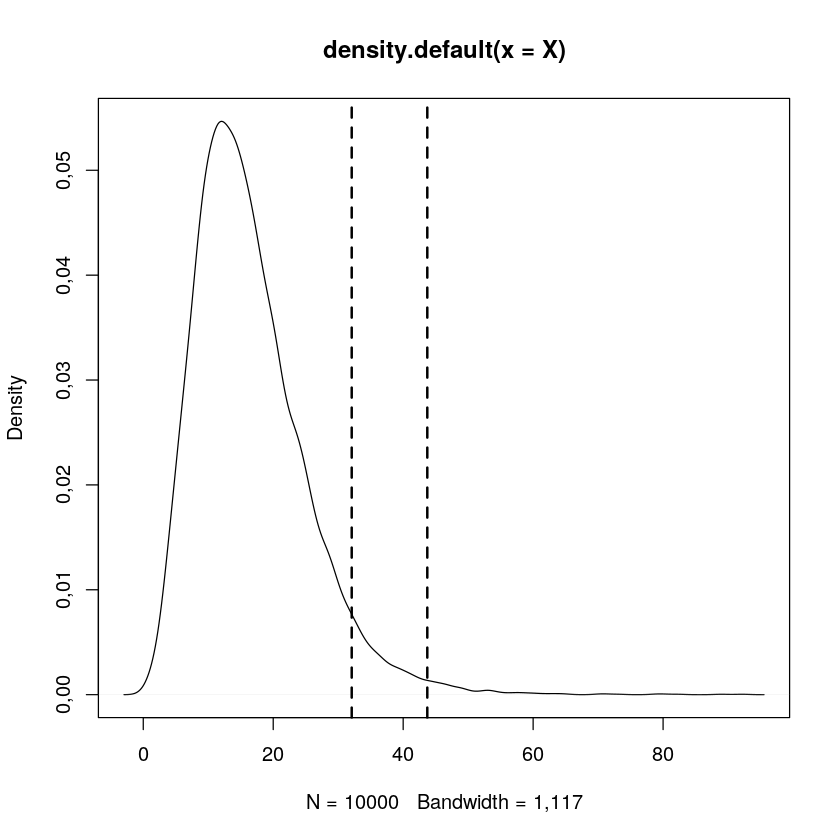

In [52]:
m = 10000
lambda = 10
xsi = 0
sigma = 1


portFolioRisk = function(m, lambda, xsi, sigma){
    X = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        Z = rlnorm(N[i], xsi, sigma) # Where can this be found in the book?
        X[i] = sum(Z)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    exactE = 16.487
    exactSd = 8.596
    print(c('numSd/exact',numericalSd/exactSd, 'numMean/exact',numericalMean/exactE))
    return(list(numericalMean, numericalSd, X))
}

out = portFolioRisk(m, lambda, xsi, sigma)
mean = out[1]
sd = out[2]
X = unlist(out[3])

epsilon = c(0.05, 0.01)
qEpsilon = sort(X)[(1-epsilon)*m]
print(c('qEpsilon', qEpsilon))
plot(density(X))
abline(v = qEpsilon[1], lty=2, lwd=2)
abline(v = qEpsilon[2], lty=2, lwd=2)